In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.__version__

'2.10.0'

# Classification

In [4]:
fmnist_data = keras.datasets.fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

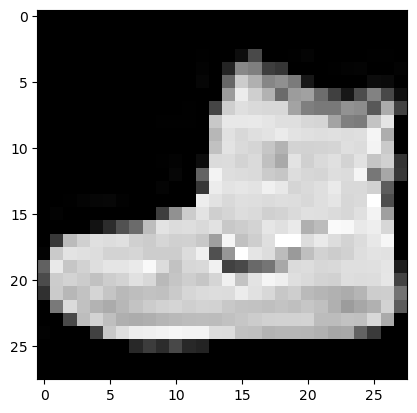

In [10]:
plt.imshow(x_train[0,], cmap="gray")

In [11]:
x_train, x_test = x_train/255.0, x_test/255.0

In [12]:
x_train[0][27]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(75, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# Define Model 

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 75)                7575      
                                                                 
 dense_5 (Dense)             (None, 10)                760       
                                                                 
Total params: 86,835
Trainable params: 86,835
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers

In [18]:
model.layers[1].get_weights()

[array([[ 0.00590943,  0.0364219 , -0.01321007, ..., -0.02148709,
         -0.03863076,  0.05105889],
        [-0.07697088, -0.08204425,  0.06148881, ...,  0.04152409,
          0.07390341, -0.06142939],
        [-0.02447209,  0.02842152,  0.00789221, ..., -0.06847561,
          0.06817973, -0.02797568],
        ...,
        [ 0.0470434 , -0.05561971,  0.04815152, ...,  0.04687424,
          0.0702793 ,  0.07234435],
        [-0.06868665, -0.05742767,  0.02730598, ...,  0.0378281 ,
         -0.04415051, -0.07273079],
        [-0.06604731, -0.06642389,  0.06282365, ...,  0.01301966,
         -0.07413664, -0.06157251]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [19]:
weights, bias = model.layers[1].get_weights()

In [20]:
weights

array([[ 0.00590943,  0.0364219 , -0.01321007, ..., -0.02148709,
        -0.03863076,  0.05105889],
       [-0.07697088, -0.08204425,  0.06148881, ...,  0.04152409,
         0.07390341, -0.06142939],
       [-0.02447209,  0.02842152,  0.00789221, ..., -0.06847561,
         0.06817973, -0.02797568],
       ...,
       [ 0.0470434 , -0.05561971,  0.04815152, ...,  0.04687424,
         0.0702793 ,  0.07234435],
       [-0.06868665, -0.05742767,  0.02730598, ...,  0.0378281 ,
        -0.04415051, -0.07273079],
       [-0.06604731, -0.06642389,  0.06282365, ...,  0.01301966,
        -0.07413664, -0.06157251]], dtype=float32)

In [21]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# Compile Model

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Fit Model

In [23]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.7678 - accuracy: 0.7440 - val_loss: 0.5410 - val_accuracy: 0.8170
Epoch 2/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.5105 - accuracy: 0.8231 - val_loss: 0.5171 - val_accuracy: 0.8208
Epoch 3/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4619 - accuracy: 0.8383 - val_loss: 0.4468 - val_accuracy: 0.8422
Epoch 4/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4332 - accuracy: 0.8485 - val_loss: 0.4378 - val_accuracy: 0.8423
Epoch 5/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4114 - accuracy: 0.8564 - val_loss: 0.4196 - val_accuracy: 0.8557
Epoch 6/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3945 - accuracy: 0.8614 - val_loss: 0.4150 - val_accuracy: 0.8540
Epoch 7/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3809 - accuracy: 0.8657 - val_loss: 0.3923 - val_accuracy:

In [24]:
print(history.history)

{'loss': [0.7678002715110779, 0.5104964971542358, 0.4619326889514923, 0.4331876039505005, 0.4114370048046112, 0.394499808549881, 0.3809126913547516, 0.3690374791622162, 0.35952821373939514, 0.3504410982131958, 0.3425065577030182, 0.3347148895263672, 0.32777753472328186, 0.3217780590057373, 0.3139323890209198, 0.3094021677970886, 0.303305447101593, 0.29852744936943054, 0.2940112054347992, 0.2893234193325043, 0.2849601209163666, 0.2811121940612793, 0.2759137451648712, 0.2726683020591736, 0.26861757040023804, 0.2641804814338684, 0.2606666684150696, 0.2579876780509949, 0.2535760998725891, 0.24937348067760468, 0.2462623119354248, 0.24405306577682495, 0.24014663696289062, 0.2382400780916214, 0.23410598933696747, 0.23145540058612823, 0.22872719168663025, 0.22647102177143097, 0.22296395897865295, 0.22017015516757965, 0.21776394546031952, 0.21434538066387177, 0.21254275739192963, 0.21010753512382507, 0.20708927512168884, 0.20411363244056702, 0.2024080902338028, 0.20069533586502075, 0.1990966051

In [25]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 1594}

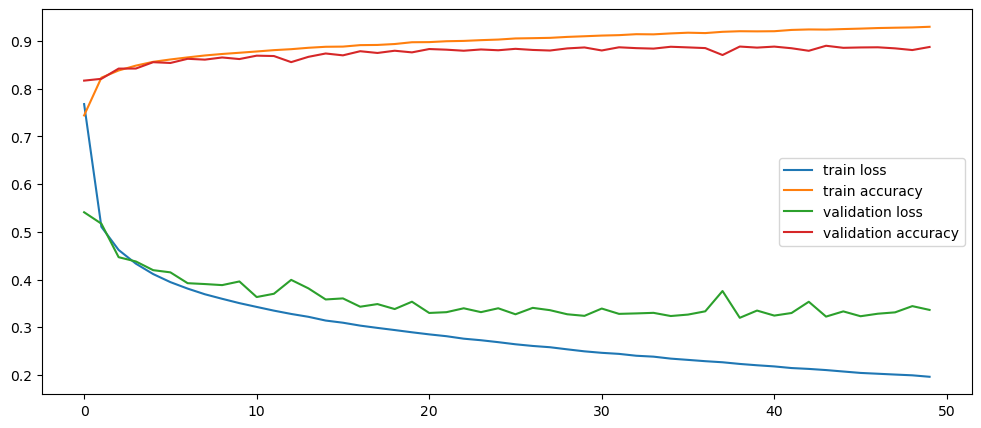

In [26]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [27]:
model.evaluate(x_test, y_test, verbose=0)

[0.3533515930175781, 0.878600001335144]

In [28]:
model.evaluate(x_test, y_test, verbose=0)

[0.3533515930175781, 0.878600001335144]

In [29]:
x3 = x_test[1:3,:,:]
x3.shape

(2, 28, 28)

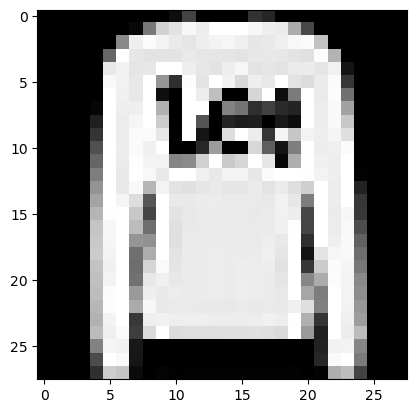

In [30]:
plt.imshow(x3[0], cmap="gray")

In [31]:
model.predict(x3).round(3)

1/1 [==============================] - 0s 183ms/step


array([[0.   , 0.   , 0.994, 0.   , 0.004, 0.   , 0.001, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [32]:
model.predict(x3).shape

1/1 [==============================] - 0s 35ms/step


(2, 10)

In [33]:
np.argmax(model.predict(x3).round(3), axis=1)

1/1 [==============================] - 0s 34ms/step


array([2, 1], dtype=int64)

In [34]:
y_test[1:3]

array([2, 1], dtype=uint8)

# Regression

In [35]:
california_housing = fetch_california_housing()

In [36]:
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [37]:
california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [38]:
california_housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [39]:
X_train0, X_test, y_train0, y_test = train_test_split(
                 california_housing["data"],
                 california_housing["target"])

In [40]:
X_train1, X_validation, y_train1, y_validation = train_test_split(X_train0,
                                                                  y_train0)

In [41]:
X_test.shape

(5160, 8)

In [42]:
X_train0.shape

(15480, 8)

In [43]:
X_train1.shape

(11610, 8)

In [44]:
X_validation.shape

(3870, 8)

In [45]:
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train1)
X_validation_s = sc.transform(X_validation)
X_test_s = sc.transform(X_test)

In [46]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)
])

In [47]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [48]:
model.fit(X_train_s, y_train1, epochs=30,
          validation_data=(X_validation_s, y_validation))

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.8550 - mean_absolute_error: 0.6495 - val_loss: 0.8291 - val_mean_absolute_error: 0.5215
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7304 - mean_absolute_error: 0.4991 - val_loss: 0.4193 - val_mean_absolute_error: 0.4667
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4186 - mean_absolute_error: 0.4663 - val_loss: 0.3996 - val_mean_absolute_error: 0.4469
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3971 - mean_absolute_error: 0.4532 - val_loss: 0.3779 - val_mean_absolute_error: 0.4347
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3829 - mean_absolute_error: 0.4435 - val_loss: 0.3641 - val_mean_absolute_error: 0.4329
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3708 - mean_absolute_error: 0.4367 - val_loss: 0.3568 - val_mean_absolute_error: 0.4262
Epoch 7/30
363/3

# Functional API

In [49]:
X_train0.shape

(15480, 8)

In [50]:
X_train0.shape[1]

8

In [51]:
X_train0.shape[1:3]

(8,)

In [52]:
X_train0.shape[1:]

(8,)

In [53]:
input_ = keras.layers.Input(shape=X_train1.shape[1:])
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_, hidden_layer2])
output = keras.layers.Dense(1)(concatenate_layer)
model = keras.Model(inputs=[input_], outputs=[output])

In [54]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [55]:
model.fit(X_train_s, y_train1, epochs=30,
          validation_data=(X_validation_s, y_validation))

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.9427 - mean_absolute_error: 0.6556 - val_loss: 3.7580 - val_mean_absolute_error: 0.5788
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 3.4749 - mean_absolute_error: 0.6786 - val_loss: 79.3907 - val_mean_absolute_error: 0.8077
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 2087.4355 - mean_absolute_error: 4.9477 - val_loss: 2411.2312 - val_mean_absolute_error: 3.6696
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 2182.3762 - mean_absolute_error: 4.1955 - val_loss: 75036.3281 - val_mean_absolute_error: 20.5070
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 85824.6094 - mean_absolute_error: 66.8208 - val_loss: 2313088.0000 - val_mean_absolute_error: 105.7188
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 1609580.0000 - mean_absolute_error: 175.1765 - val_loss: 72081872.0000 - val_m

In [56]:
X_train_s_1, X_train_s_2 = X_train_s[:, :6], X_train_s[:, -4:]
X_validation_s_1, X_validation_s_2 = X_validation_s[:, :6], X_validation_s[:, -4:]
X_test_s_1, X_test_s_2 = X_test_s[:, :6], X_test_s[:, -4:]

In [57]:
input_1 = keras.layers.Input(shape=[6])
input_2 = keras.layers.Input(shape=[4])
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_1)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_2, hidden_layer2])
output = keras.layers.Dense(1)(concatenate_layer)
model = keras.Model(inputs=[input_1, input_2], outputs=[output])

In [58]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [59]:
model.fit((X_train_s_1, X_train_s_2), y_train1, epochs=30,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           y_validation))

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 1.4042 - mean_absolute_error: 0.6784 - val_loss: 10.8834 - val_mean_absolute_error: 0.6008
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 24.2020 - mean_absolute_error: 0.7620 - val_loss: 11.9490 - val_mean_absolute_error: 0.6691
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 14.2235 - mean_absolute_error: 1.2722 - val_loss: 336.0611 - val_mean_absolute_error: 1.6515
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 220463328764631986319917056.0000 - mean_absolute_error: 763708899328.0000 - val_loss: 72808425160603890352128.0000 - val_mean_absolute_error: 162452799488.0000
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 8537482820805504008192.0000 - mean_absolute_error: 46103482368.0000 - val_loss: 50265418535020621987840.0000 - val_mean_absolute_error: 29716639744.0000
Epoch 6/30
363/363 [=====================

In [60]:
input_1 = keras.layers.Input(shape=[6])
input_2 = keras.layers.Input(shape=[4])
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_1)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_2, hidden_layer2])
output = keras.layers.Dense(1, name="output")(concatenate_layer)
helper_output = keras.layers.Dense(1, name="helper_output")(hidden_layer2)
model_f = keras.Model(inputs=[input_1, input_2],
                    outputs=[output, helper_output])

In [61]:
model_f.compile(loss=["mse", "mse"],
              loss_weights = [0.8, 0.2],
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [62]:
model_f.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs=30,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           (y_validation, y_validation)))

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 1.3823 - output_loss: 1.3471 - helper_output_loss: 1.5230 - output_mean_absolute_error: 0.6851 - helper_output_mean_absolute_error: 0.8727 - val_loss: 8.2112 - val_output_loss: 10.0143 - val_helper_output_loss: 0.9986 - val_output_mean_absolute_error: 0.5777 - val_helper_output_mean_absolute_error: 0.6137
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 1014148.9375 - output_loss: 1266865.0000 - helper_output_loss: 3284.5623 - output_mean_absolute_error: 65.8625 - helper_output_mean_absolute_error: 3.7726 - val_loss: 12247.7129 - val_output_loss: 15306.2705 - val_helper_output_loss: 13.4771 - val_output_mean_absolute_error: 81.3700 - val_helper_output_mean_absolute_error: 3.4867
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 1092.0698 - output_loss: 1363.7491 - helper_output_loss: 5.3540 - output_mean_absolute_error: 15.8673 - helper_output_mean_absolute_error: 

Epoch 20/30
363/363 [==============================] - 1s 3ms/step - loss: 286217717478239869337600.0000 - output_loss: 357772115322602445078528.0000 - helper_output_loss: 1.3419 - output_mean_absolute_error: 110507163648.0000 - helper_output_mean_absolute_error: 0.9189 - val_loss: 6217158613090789792677888.0000 - val_output_loss: 7771446681096418406432768.0000 - val_helper_output_loss: 1.3201 - val_output_mean_absolute_error: 195808002048.0000 - val_helper_output_mean_absolute_error: 0.9062
Epoch 21/30
363/363 [==============================] - 1s 3ms/step - loss: 5478165904596920659083264.0000 - output_loss: 6847705795479081989439488.0000 - helper_output_loss: 1.3419 - output_mean_absolute_error: 499597705216.0000 - helper_output_mean_absolute_error: 0.9169 - val_loss: 118018108842805089735278592.0000 - val_output_loss: 147522707534639647793610752.0000 - val_helper_output_loss: 1.3203 - val_output_mean_absolute_error: 848685170688.0000 - val_helper_output_mean_absolute_error: 0.9077


# Subclass API

In [63]:
class WideAndDeepANN(keras.Model):
    def __init__(self, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden_layer_1 = keras.layers.Dense(50, activation=activation)
        self.hidden_layer_2 = keras.layers.Dense(10, activation=activation)
        self.final_output   = keras.layers.Dense(1)
        self.helper_output  = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_1, input_2 = inputs
        h1_out = self.hidden_layer_1(input_1)
        h2_out = self.hidden_layer_2(h1_out)
        concat_out = keras.layers.concatenate([input_2, h2_out])
        final_out = self.final_output(concat_out)
        helper_out = self.helper_output(h2_out)
        return final_out, helper_out

In [64]:
model_sub = WideAndDeepANN()

In [65]:
model_sub.compile(loss=["mse", "mse"],
              loss_weights = [0.8, 0.2],
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [66]:
model_sub.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs=30,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           (y_validation, y_validation)))

Epoch 1/30
363/363 [==============================] - 3s 4ms/step - loss: 1.0520 - output_1_loss: 0.9619 - output_2_loss: 1.4128 - output_1_mean_absolute_error: 0.6409 - output_2_mean_absolute_error: 0.8408 - val_loss: 5.6567 - val_output_1_loss: 6.8642 - val_output_2_loss: 0.8269 - val_output_1_mean_absolute_error: 0.5576 - val_output_2_mean_absolute_error: 0.6118
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 1839.8176 - output_1_loss: 2285.9084 - output_2_loss: 55.4544 - output_1_mean_absolute_error: 3.9419 - output_2_mean_absolute_error: 1.2228 - val_loss: 106.7892 - val_output_1_loss: 133.1298 - val_output_2_loss: 1.4269 - val_output_1_mean_absolute_error: 1.3650 - val_output_2_mean_absolute_error: 0.8788
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 88.7593 - output_1_loss: 110.6038 - output_2_loss: 1.3814 - output_1_mean_absolute_error: 1.9492 - output_2_mean_absolute_error: 0.8955 - val_loss: 1997.6017 - val_output_1_loss: 

363/363 [==============================] - 1s 2ms/step - loss: 465432934229106346688512.0000 - output_1_loss: 581791320908770263957504.0000 - output_2_loss: 1.3419 - output_1_mean_absolute_error: 103366320128.0000 - output_2_mean_absolute_error: 0.9174 - val_loss: 10706636681412108827492352.0000 - val_output_1_loss: 13383283457858961510760448.0000 - val_output_2_loss: 1.3207 - val_output_1_mean_absolute_error: 257442365440.0000 - val_output_2_mean_absolute_error: 0.9090
Epoch 21/30
363/363 [==============================] - 1s 3ms/step - loss: 9072415989031335209467904.0000 - output_1_loss: 11340520995095485542825984.0000 - output_2_loss: 1.3420 - output_1_mean_absolute_error: 485159239680.0000 - output_2_mean_absolute_error: 0.9186 - val_loss: 203428572269300458622812160.0000 - val_output_1_loss: 254285692278195481141575680.0000 - val_output_2_loss: 1.3204 - val_output_1_mean_absolute_error: 1115456667648.0000 - val_output_2_mean_absolute_error: 0.9079
Epoch 22/30
363/363 [===========

In [67]:
model_f.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense_15 (Dense)               (None, 50)           350         ['input_4[0][0]']                
                                                                                                  
 input_5 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense_16 (Dense)               (None, 10)           510         ['dense_15[0][0]']               
                                                                                            

In [68]:
model_f.save("housing_reg_model_f.h5")

In [69]:
model_f_reg = keras.models.load_model("housing_reg_model_f.h5")

In [70]:
model_f_reg.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense_15 (Dense)               (None, 50)           350         ['input_4[0][0]']                
                                                                                                  
 input_5 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense_16 (Dense)               (None, 10)           510         ['dense_15[0][0]']               
                                                                                            

In [71]:
model_sub.summary()

Model: "wide_and_deep_ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            multiple                  350       
                                                                 
 dense_18 (Dense)            multiple                  510       
                                                                 
 dense_19 (Dense)            multiple                  15        
                                                                 
 dense_20 (Dense)            multiple                  11        
                                                                 
Total params: 886
Trainable params: 886
Non-trainable params: 0
_________________________________________________________________


In [72]:
# model_sub.save("housing_reg_model_sub.h5")
#.save_weight()

In [73]:
# here you haven't the model's structure but you can run the the codes again to rebuild the model's architecture.
# next instead of waiting for model to train you can just load the wiegths on the architecture of model.
model_sub.save_weights("housing_reg_model_sub.h5")


# Callback

In [74]:
# this cell is the most usefull application of call back. especially the "EarlyStoppin" one.
model_checkpoint_callback = keras.callbacks.ModelCheckpoint("model_cb_reg_housing.h5",
                                                         save_best_only=True)
earlystopping_callback = keras.callbacks.EarlyStopping(patience=5,
                             restore_best_weights=True)

In [75]:
# The early stopping callback doesn't need a path to save. because the model itself trains wherever earlystopping determines.
model_f.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs=5,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           (y_validation, y_validation)),
           callbacks=[model_checkpoint_callback, earlystopping_callback])

Epoch 1/5
363/363 [==============================] - 1s 3ms/step - loss: inf - output_loss: inf - helper_output_loss: 1.3420 - output_mean_absolute_error: 1447796641842069504.0000 - helper_output_mean_absolute_error: 0.9184 - val_loss: inf - val_output_loss: inf - val_helper_output_loss: 1.3204 - val_output_mean_absolute_error: 2132789774606401536.0000 - val_helper_output_mean_absolute_error: 0.9078
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: inf - output_loss: inf - helper_output_loss: 1.3420 - output_mean_absolute_error: 5147189962596155392.0000 - helper_output_mean_absolute_error: 0.9183 - val_loss: inf - val_output_loss: inf - val_helper_output_loss: 1.3202 - val_output_mean_absolute_error: 9239156625783128064.0000 - val_helper_output_mean_absolute_error: 0.9071
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: inf - output_loss: inf - helper_output_loss: 1.3419 - output_mean_absolute_error: 25546218086491750400.0000 - helper_outp

In [76]:
class MyCallback(keras.callbacks.Callback):
    def on_train_end(self, logs=None):
        print("")
    def on_epoch_end(self, epoch, logs):
        print(logs["val_loss"])

In [77]:
mycb = MyCallback()

In [78]:
tb_callback = keras.callbacks.TensorBoard("tb_log")

In [79]:
model_f.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs=5,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           (y_validation, y_validation)),
           callbacks=[tb_callback])

Epoch 1/5
363/363 [==============================] - 1s 3ms/step - loss: inf - output_loss: inf - helper_output_loss: 1.3419 - output_mean_absolute_error: 5118376160878657536.0000 - helper_output_mean_absolute_error: 0.9177 - val_loss: inf - val_output_loss: inf - val_helper_output_loss: 1.3204 - val_output_mean_absolute_error: 9155517875769835520.0000 - val_helper_output_mean_absolute_error: 0.9081
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: inf - output_loss: inf - helper_output_loss: 1.3419 - output_mean_absolute_error: 20463677208585568256.0000 - helper_output_mean_absolute_error: 0.9185 - val_loss: inf - val_output_loss: inf - val_helper_output_loss: 1.3202 - val_output_mean_absolute_error: 39870530228831911936.0000 - val_helper_output_mean_absolute_error: 0.9071
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: inf - output_loss: inf - helper_output_loss: 1.3420 - output_mean_absolute_error: 92036089750524788736.0000 - helper_ou

In [80]:
%load_ext tensorboard

In [81]:
%tensorboard --logdir=./tb_log 

Reusing TensorBoard on port 6006 (pid 8352), started 17:37:38 ago. (Use '!kill 8352' to kill it.)

# Hyperparameter optimization

In [82]:
def ann_model(number_of_hidden_layers=1,
              number_of_neurons=50,
              lr=0.01):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=[8]))
    for hidden_layer in range(number_of_hidden_layers):
        model.add(keras.layers.Dense(number_of_neurons, activation="selu"))
    model.add(keras.layers.Dense(1))
    sgd = keras.optimizers.SGD(lr=lr)
    model.compile(loss="mse", optimizer=sgd)
    return model

In [83]:
keras_sk_reg = keras.wrappers.scikit_learn.KerasRegressor(build_fn=ann_model)

C:\Users\AbbasiLio\AppData\Local\Temp\ipykernel_8012\579028058.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_sk_reg = keras.wrappers.scikit_learn.KerasRegressor(build_fn=ann_model)


In [84]:
param_grid = {"number_of_hidden_layers":[1, 3, 5],
              "number_of_neurons":[50, 100, 150],
              "lr":[0.001, 0.001, 0.1]}

In [85]:
keras_sk_reg_gs = GridSearchCV(keras_sk_reg, param_grid)

In [87]:
keras_sk_reg_gs.fit(X_train_s, y_train1, epochs=10,
                    validation_data=(X_validation_s, y_validation),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/10


C:\Users\AbbasiLio\anaconda3\envs\hossein\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 2.1744 - val_loss: 0.7303
Epoch 2/10
291/291 [==============================] - 1s 3ms/step - loss: 0.6582 - val_loss: 0.6036
Epoch 3/10
291/291 [==============================] - 1s 2ms/step - loss: 0.5874 - val_loss: 0.5491
Epoch 4/10
291/291 [==============================] - 1s 2ms/step - loss: 0.5483 - val_loss: 0.5226
Epoch 5/10
291/291 [==============================] - 1s 2ms/step - loss: 0.5283 - val_loss: 0.5066
Epoch 6/10
291/291 [==============================] - 1s 2ms/step - loss: 0.5167 - val_loss: 0.4963
Epoch 7/10
291/291 [==============================] - 1s 2ms/step - loss: 0.5090 - val_loss: 0.4893
Epoch 8/10
291/291 [==============================] - 1s 2ms/step - loss: 0.5040 - val_loss: 0.4850
Epoch 9/10
291/291 [==============================] - 1s 2ms/step - loss: 0.5001 - val_loss: 0.4817
Epoch 10/10
73/73 [==============================] - 0s 1ms/step - loss: 0.5011
Epoch 1/10
291/291 [===========

73/73 [==============================] - 0s 2ms/step - loss: 0.5270
Epoch 1/10
291/291 [==============================] - 1s 3ms/step - loss: 1.7203 - val_loss: 0.6801
Epoch 2/10
291/291 [==============================] - 1s 3ms/step - loss: 0.6078 - val_loss: 0.5962
Epoch 3/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5568 - val_loss: 0.5740
Epoch 4/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5307 - val_loss: 0.5651
Epoch 5/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5169 - val_loss: 0.5673
Epoch 6/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5086 - val_loss: 0.5724
Epoch 7/10
291/291 [==============================] - 1s 2ms/step - loss: 0.5037 - val_loss: 0.5821
Epoch 8/10
291/291 [==============================] - 1s 2ms/step - loss: 0.5001 - val_loss: 0.5985
Epoch 9/10
73/73 [==============================] - 0s 2ms/step - loss: 0.8429
Epoch 1/10
291/291 [==============================] -

73/73 [==============================] - 0s 2ms/step - loss: 0.4580
Epoch 1/10
291/291 [==============================] - 2s 4ms/step - loss: 1.0361 - val_loss: 0.5529
Epoch 2/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5260 - val_loss: 0.5002
Epoch 3/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5014 - val_loss: 0.4823
Epoch 4/10
291/291 [==============================] - 1s 4ms/step - loss: 0.4887 - val_loss: 0.4687
Epoch 5/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4780 - val_loss: 0.4596
Epoch 6/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4691 - val_loss: 0.4555
Epoch 7/10
291/291 [==============================] - 1s 4ms/step - loss: 0.4618 - val_loss: 0.4438
Epoch 8/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4544 - val_loss: 0.4397
Epoch 9/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4489 - val_loss: 0.4397
Epoch 10/10
73/73 [=============

73/73 [==============================] - 0s 2ms/step - loss: 1.0847
Epoch 1/10
291/291 [==============================] - 2s 4ms/step - loss: 0.8951 - val_loss: 0.5368
Epoch 2/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5297 - val_loss: 0.4979
Epoch 3/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5047 - val_loss: 0.4655
Epoch 4/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4851 - val_loss: 0.4696
Epoch 5/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4764 - val_loss: 0.4508
Epoch 6/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4676 - val_loss: 0.4578
Epoch 7/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4611 - val_loss: 0.4678
Epoch 8/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4550 - val_loss: 0.4450
Epoch 9/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4508 - val_loss: 0.4399
Epoch 10/10
73/73 [=============

291/291 [==============================] - 1s 3ms/step - loss: 0.4127 - val_loss: 0.4135
Epoch 10/10
73/73 [==============================] - 0s 2ms/step - loss: 0.4267
Epoch 1/10
291/291 [==============================] - 2s 4ms/step - loss: 0.8070 - val_loss: 0.6127
Epoch 2/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5294 - val_loss: 0.5103
Epoch 3/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4908 - val_loss: 0.4920
Epoch 4/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4704 - val_loss: 0.4651
Epoch 5/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4566 - val_loss: 0.4500
Epoch 6/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4445 - val_loss: 0.4536
Epoch 7/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4342 - val_loss: 0.4414
Epoch 8/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4263 - val_loss: 0.4326
Epoch 9/10
291/291 [===========

291/291 [==============================] - 1s 3ms/step - loss: 0.4319 - val_loss: 0.4662
Epoch 6/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4240 - val_loss: 0.4412
Epoch 7/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4150 - val_loss: 0.4671
Epoch 8/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4098 - val_loss: 0.4311
Epoch 9/10
291/291 [==============================] - 1s 4ms/step - loss: 0.4032 - val_loss: 0.4225
Epoch 10/10
73/73 [==============================] - 0s 2ms/step - loss: 0.3678
Epoch 1/10
291/291 [==============================] - 2s 5ms/step - loss: 0.6123 - val_loss: 0.4743
Epoch 2/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4633 - val_loss: 0.4478
Epoch 3/10
291/291 [==============================] - 1s 4ms/step - loss: 0.4370 - val_loss: 0.4319
Epoch 4/10
291/291 [==============================] - 1s 4ms/step - loss: 0.4228 - val_loss: 0.4420
Epoch 5/10
291/291 [===========

291/291 [==============================] - 1s 3ms/step - loss: 0.5360 - val_loss: 0.5338
Epoch 4/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5228 - val_loss: 0.5222
Epoch 5/10
291/291 [==============================] - 1s 4ms/step - loss: 0.5160 - val_loss: 0.5120
Epoch 6/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5089 - val_loss: 0.5110
Epoch 7/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5064 - val_loss: 0.5024
Epoch 8/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5003 - val_loss: 0.5015
Epoch 9/10
291/291 [==============================] - 1s 2ms/step - loss: 0.4998 - val_loss: 0.4908
Epoch 10/10
73/73 [==============================] - 0s 2ms/step - loss: 0.5402
Epoch 1/10
291/291 [==============================] - 2s 3ms/step - loss: 2.0131 - val_loss: 0.6013
Epoch 2/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5612 - val_loss: 0.5476
Epoch 3/10
291/291 [===========

291/291 [==============================] - 1s 3ms/step - loss: 0.5302 - val_loss: 0.5174
Epoch 5/10
291/291 [==============================] - 1s 2ms/step - loss: 0.5182 - val_loss: 0.5058
Epoch 6/10
291/291 [==============================] - 1s 2ms/step - loss: 0.5140 - val_loss: 0.4991
Epoch 7/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5061 - val_loss: 0.4903
Epoch 8/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5038 - val_loss: 0.4883
Epoch 9/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5002 - val_loss: 0.4886
Epoch 10/10
73/73 [==============================] - 0s 2ms/step - loss: 0.5067
Epoch 1/10
291/291 [==============================] - 1s 3ms/step - loss: 1.4831 - val_loss: 0.5693
Epoch 2/10
291/291 [==============================] - 1s 2ms/step - loss: 0.5390 - val_loss: 0.5325
Epoch 3/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5152 - val_loss: 0.5128
Epoch 4/10
291/291 [===========

291/291 [==============================] - 1s 3ms/step - loss: 0.5463 - val_loss: 0.5294
Epoch 3/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5206 - val_loss: 0.5240
Epoch 4/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5039 - val_loss: 0.5185
Epoch 5/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4925 - val_loss: 0.5250
Epoch 6/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4817 - val_loss: 0.5449
Epoch 7/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4737 - val_loss: 0.5451
Epoch 8/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4655 - val_loss: 0.5579
Epoch 9/10
73/73 [==============================] - 0s 2ms/step - loss: 0.8986
Epoch 1/10
291/291 [==============================] - 2s 4ms/step - loss: 0.8266 - val_loss: 0.5671
Epoch 2/10
291/291 [==============================] - 1s 3ms/step - loss: 0.5341 - val_loss: 0.5252
Epoch 3/10
291/291 [============

291/291 [==============================] - 1s 4ms/step - loss: 0.4776 - val_loss: 0.4873
Epoch 4/10
291/291 [==============================] - 1s 4ms/step - loss: 0.4653 - val_loss: 0.4719
Epoch 5/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4555 - val_loss: 0.4627
Epoch 6/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4479 - val_loss: 0.4841
Epoch 7/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4406 - val_loss: 0.4510
Epoch 8/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4352 - val_loss: 0.4636
Epoch 9/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4292 - val_loss: 0.4527
Epoch 10/10
73/73 [==============================] - 0s 2ms/step - loss: 0.4375
Epoch 1/10
291/291 [==============================] - 2s 4ms/step - loss: 0.7515 - val_loss: 0.5034
Epoch 2/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4818 - val_loss: 0.4833
Epoch 3/10
291/291 [===========

291/291 [==============================] - 1s 3ms/step - loss: 0.4883 - val_loss: 0.4706
Epoch 4/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4722 - val_loss: 0.4531
Epoch 5/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4601 - val_loss: 0.4652
Epoch 6/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4499 - val_loss: 0.4424
Epoch 7/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4422 - val_loss: 0.4416
Epoch 8/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4362 - val_loss: 0.4216
Epoch 9/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4289 - val_loss: 0.4154
Epoch 10/10
73/73 [==============================] - 0s 2ms/step - loss: 0.3865
Epoch 1/10
291/291 [==============================] - 2s 4ms/step - loss: 0.6567 - val_loss: 0.4838
Epoch 2/10
291/291 [==============================] - 1s 3ms/step - loss: 0.4597 - val_loss: 0.4929
Epoch 3/10
291/291 [===========

73/73 [==============================] - 0s 2ms/step - loss: 0.4007
Epoch 1/10
291/291 [==============================] - 2s 4ms/step - loss: 0.6139 - val_loss: 0.4731
Epoch 2/10
291/291 [==============================] - 1s 4ms/step - loss: 0.4507 - val_loss: 0.4572
Epoch 3/10
291/291 [==============================] - 1s 4ms/step - loss: 0.4265 - val_loss: 0.4548
Epoch 4/10
291/291 [==============================] - 1s 4ms/step - loss: 0.4086 - val_loss: 0.4414
Epoch 5/10
291/291 [==============================] - 1s 3ms/step - loss: 0.3985 - val_loss: 0.4531
Epoch 6/10
291/291 [==============================] - 1s 3ms/step - loss: 0.3916 - val_loss: 0.4595
Epoch 7/10
291/291 [==============================] - 1s 4ms/step - loss: 0.3847 - val_loss: 0.4366
Epoch 8/10
291/291 [==============================] - 1s 4ms/step - loss: 0.3800 - val_loss: 0.4026
Epoch 9/10
291/291 [==============================] - 1s 3ms/step - loss: 0.3751 - val_loss: 0.3993
Epoch 10/10
73/73 [=============

291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/10
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/10
291/291 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/10
73/73 [==============================] - 0s 1ms/step - loss: nan
Epoch 1/10
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
291/291 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/10
291/291 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/10
291/291 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/10
73/73 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
29

Epoch 3/10
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/10
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/10
73/73 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
291/291 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/10
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/10
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/10
73/73 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/10
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Ep

Epoch 5/10
73/73 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10
291/291 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 2/10
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/10
291/291 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 4/10
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/10
73/73 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10
291/291 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 2/10
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/10
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/10
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/10
73/73 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10
291/291 [

C:\Users\AbbasiLio\anaconda3\envs\hossein\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [-0.71813757 -0.57248784 -0.57333701 -0.49297711 -0.57764125 -0.5150642
 -0.43539508 -0.45796334 -0.4579056  -0.56418533 -0.65384753 -0.78965253
 -0.54335446 -0.565841   -0.58106939 -0.4516394  -0.45469628 -0.44039759
         nan         nan         nan         nan         nan         nan
         nan         nan         nan]
  warnings.warn(


Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 0.7245 - val_loss: 0.4777
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4603 - val_loss: 0.4456
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4385 - val_loss: 0.4328
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4258 - val_loss: 0.4200
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4173 - val_loss: 0.4126
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4107 - val_loss: 0.4061
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4047 - val_loss: 0.4076
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3997 - val_loss: 0.4061
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3941 - val_loss: 0.3968
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3901 - val_loss: 0.3920

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000008CE7100700>,
             param_grid={'lr': [0.001, 0.001, 0.1],
                         'number_of_hidden_layers': [1, 3, 5],
                         'number_of_neurons': [50, 100, 150]})

In [88]:
# this is best parameters for the model. later you can tweak the hyperparameters in "param_grid" to approximate toward 
# better model.
keras_sk_reg_gs.best_params_

{'lr': 0.001, 'number_of_hidden_layers': 5, 'number_of_neurons': 50}

In [89]:
# this code sets the best parameters as your model.
model = keras_sk_reg_gs.best_estimator_.model

# you can later search for these keyword to find out more methods
- Hyperopt 
- Hyperas
- Kerastuner
- Skopt
- Hyperband